In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
data = pd.read_csv('Sensor.csv')
#print(data)

x = np.asanyarray(data.drop(columns=['D']))
y = np.asanyarray(data[['D']])

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

ytrain = keras.utils.to_categorical(ytrain,9)
ytest = keras.utils.to_categorical(ytest,9)

In [14]:
model = Sequential()

model.add(Dense(32,activation='relu',input_shape=[x.shape[1]]))
model.add(Dense(16,activation='relu'))
model.add(Dense(9,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
hist = model.fit(xtrain,ytrain,batch_size=10,epochs=150,verbose=0,validation_data=(xtest,ytest))

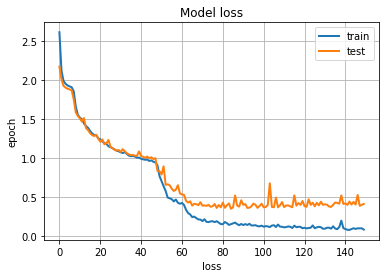

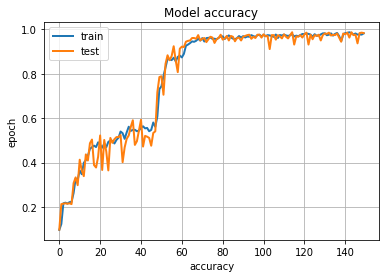

In [16]:
plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('Model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

In [17]:
ypred = model.predict(x)
ypred = np.argmax(ypred,axis=1)

print('\nMétricas: \n', classification_report(y,ypred));

print('Matriz de confusión: \n', confusion_matrix(y,ypred))


Métricas: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       0.97      0.98      0.98       300
           2       0.99      1.00      0.99       300
           3       0.99      0.99      0.99       300
           4       1.00      1.00      1.00       300
           5       0.99      0.99      0.99       300
           6       0.98      0.97      0.98       300
           7       1.00      0.96      0.98       300
           8       0.97      0.98      0.97       300

    accuracy                           0.99      2700
   macro avg       0.99      0.99      0.99      2700
weighted avg       0.99      0.99      0.99      2700

Matriz de confusión: 
 [[299   0   0   0   0   1   0   0   0]
 [  1 295   0   0   0   0   4   0   0]
 [  0   1 299   0   0   0   0   0   0]
 [  0   0   1 298   0   0   0   1   0]
 [  0   0   0   0 299   1   0   0   0]
 [  1   0   1   0   0 298   0   0   0]
 [  0   7   0   0   1   0